<a href="https://colab.research.google.com/github/AlyssaZhang-TMMC/PolygonTraining/blob/main/VIKS_polygons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Prerequisites

Install TensorFlow and Keras requirements for Mask R-CNN (MRCNN)


In [1]:
!pip install tensorflow-gpu==1.15.0
!pip install keras==2.1.0
%tensorflow_version 1.x

     |████████████████████████████████| 411.5 MB 8.4 kB/s 
     |████████████████████████████████| 50 kB 4.4 MB/s 
     |████████████████████████████████| 503 kB 36.7 MB/s 
     |████████████████████████████████| 3.8 MB 39.6 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=2e4ebf6c8e409fc250984ffcc7c74055c0d3b5dc048d058063b269146bc44ec3
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Succe

# Set up your Google Drive

Allow Colab to access your Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

Navigate into your Drive

In [3]:
%cd /content/
%cd drive/"My Drive"
#%cd /"My Drive"

/content
/content/drive/My Drive


Navigate into the Mask_RCNN folder and run setup.py.

In [4]:
%cd Mask_RCNN/
!python setup.py install

/content/drive/My Drive/Mask_RCNN
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'license-file' will not be supported in future versions. Please use the underscore name 'license_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'requirements-file' will not be supported in future versions. Please use the underscore name 'requirements_file' instead
  % (opt, underscore_opt))
running install
running bdist_egg
running egg_info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
reading manifest te

Navigate into the folder for training

In [5]:
%cd ../fine-tune-MaskRcnn/

/content/drive/My Drive/fine-tune-MaskRcnn


Force reinstall h5py for the weight file

In [6]:
!pip install 'h5py==2.10.0' -force-reinstall.

Looking in links: orce-reinstall.
     |████████████████████████████████| 2.9 MB 5.2 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


# Training Model

Start training model. For starting from the beginning, use --weights=coco. If starting from previous training, use --weights=last

There will be many warnings because MRCNN uses old versions of Tensorflow and Keras - just ignore them.

If you've already finished training, don't run this.

In [9]:
!python3 polydetect.py train --dataset=polydetect --weights=coco

# If you get the error:
# AttributeError: 'Model' object has no attribute 'metrics_tensors'
# then make sure your Keras version is 2.1.0 (run the block below if needed) and try this one again

Using TensorFlow backend.
Weights:  coco
Dataset:  polydetect
Logs:  /content/drive/My Drive/logs

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.85
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'm

In [8]:
# Run this to ensure Keras v2.1.0 (if the block above returned the error: 'Model' object has no attribute 'metrics_tensors')
!pip install keras==2.1.0

  Using cached Keras-2.1.0-py2.py3-none-any.whl (302 kB)
  Attempting uninstall: keras
    Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


# Setting up Validation

Make sure MRCNN is still imported and run setup.py again

In [10]:
%cd ../Mask_RCNN/
!python setup.py install

/content/drive/MyDrive/Mask_RCNN
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'license-file' will not be supported in future versions. Please use the underscore name 'license_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'requirements-file' will not be supported in future versions. Please use the underscore name 'requirements_file' instead
  % (opt, underscore_opt))
running install
running bdist_egg
running egg_info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
reading manifest tem

Navigate back into the training folder

In [12]:
%cd ../fine-tune-MaskRcnn

/content/drive/My Drive/fine-tune-MaskRcnn


Set up visualization of testing. 

If you see the error that MRCNN is not found, try running the setup.py above again (without navigating into fine-tune-MaskRcnn). Then try running this again. If you see the error that polydetect is not found, navigate into fine-tune-MaskRcnn (without running the setup.py) and try running this again.

In [13]:
%matplotlib inline
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
ROOT_DIR = os.path.abspath("../")
from mrcnn import utils
from mrcnn import visualize
from mrcnn.utils import *
from mrcnn.visualize import *
import mrcnn.model as modellib
from mrcnn.model import log
import polydetect
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
MODEL_WEIGHTS_PATH = ROOT_DIR +"/mask_rcnn_coco.h5"

Configure folder

In [14]:
config = polydetect.CustomConfig()
POLYDETECT_DIR = ROOT_DIR+"/fine-tune-MaskRcnn/polydetect"

Override training configurations with changes for inferencing

In [15]:
class InferenceConfig(config.__class__):
    # one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    # change min confidence level to whatever you need
    DETECTION_MIN_CONFIDENCE = 0.8

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.8
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

Set target device to GPU

In [16]:
DEVICE = "/gpu:0"  # /cpu:0 or /gpu:0

Set up Matplotlib plot

In [17]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

Load dataset (you should see the number of images in your validation set, as well as the classes. The classes will include BG for the background)

In [18]:
dataset = polydetect.CustomDataset()
dataset.load_custom(POLYDETECT_DIR, "val")

# Must call before using the dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

Images: 17
Classes: ['BG', 'split']


Load model (ignore the warnings)

In [19]:
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


Load weights (change the path accordingly).

It should say "Re-starting from epoch X" where X is the epoch of the path you specified.

In [20]:
weights_path = "/content/drive/My Drive/logs/split20211215T1442/mask_rcnn_split_0008.h5"

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

Loading weights  /content/drive/My Drive/logs/split20211215T1442/mask_rcnn_split_0008.h5
Re-starting from epoch 8


In [21]:
%pwd

'/content/drive/My Drive/fine-tune-MaskRcnn'

In [22]:
%cd /content/drive/My Drive/Mask_RCNN/mrcnn

/content/drive/My Drive/Mask_RCNN/mrcnn


# Validating the Model

There are 2 code blocks that you can use for validation here. The first one (directly under this) will test a random image from your val dataset. The second one (2 blocks under this) allows you to specify the path of whatever image you want to test.

Some notes on terminology: 
* Score means confidence level/accuracy. For example, if the score is 0.96, we are 96% confident that the object detected belongs to that class.
* Ground Truth labels are the original labels that you annotated

image ID: split.f.jpg (5) /content/drive/My Drive/fine-tune-MaskRcnn/polydetect/val/f.jpg
Original image shape:  [832 832   3]
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min:    0.00000  max:  255.00000  uint8
image_metas              shape: (1, 14)               min:    1.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
gt_class_id              shape: (2,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (2, 4)                min:   98.00000  max:  832.00000  int32
gt_mask                  shape: (1024, 1024, 2)       min:    0.00000  max:    1.00000  bool
AP @0.50:	 1.000
AP @0.55:	 1.000
AP @0.60:	 1.000
AP @0.65:	 0.500
AP @0.70:	 0.000
AP @0.75:	 0.000
AP @0.80:	 0.000
AP @0.85:	 0.000
AP @0.90:	 0.000
AP @0.95:	 0.000
AP @0.50-0.95:	 0.350


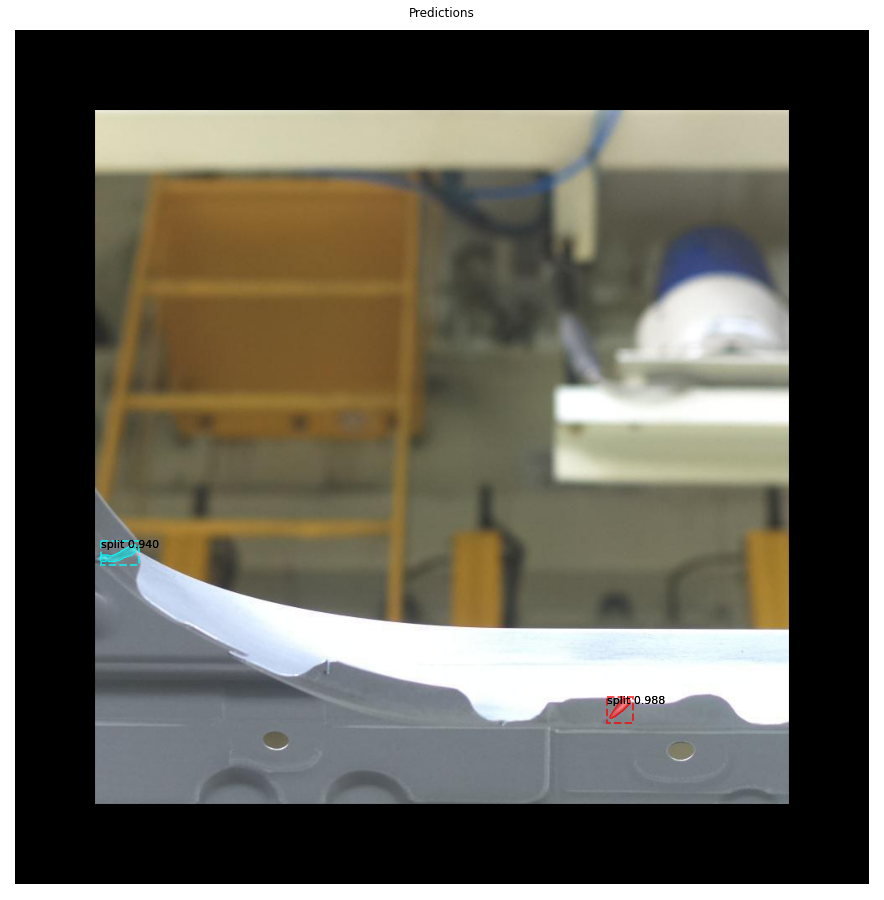

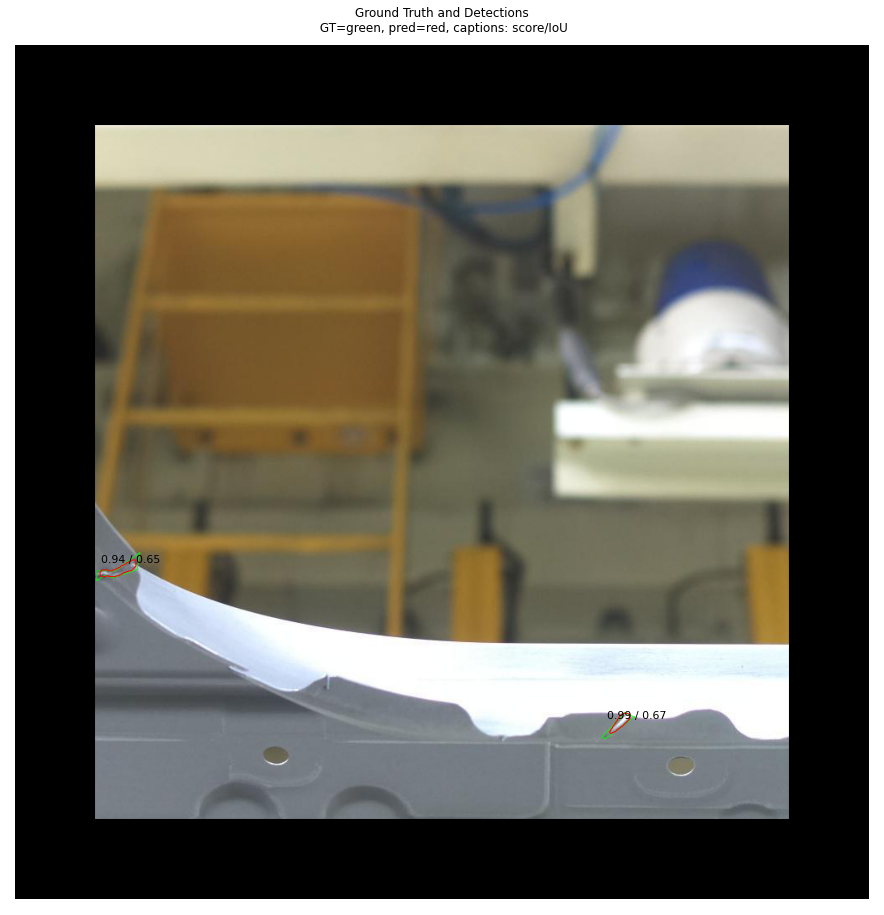

In [27]:
# This tests out a random image:
image_id = random.choice(dataset.image_ids)
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))
print("Original image shape: ", modellib.parse_image_meta(image_meta[np.newaxis,...])["original_image_shape"][0])

# Run object detection
results = model.detect_molded(np.expand_dims(image, 0), np.expand_dims(image_meta, 0), verbose=1)

# Display predictions with scores
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax, 
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

# Compute AP over range 0.5 to 0.95 and print it
utils.compute_ap_range(gt_bbox, gt_class_id, gt_mask,
                       r['rois'], r['class_ids'], r['scores'], r['masks'],
                       verbose=1)

# Display ground truth boxes and predictions with scores and IoU
visualize.display_differences(image, gt_bbox, gt_class_id, gt_mask, r['rois'], 
                              r['class_ids'], r['scores'], r['masks'], 
                              dataset.class_names, ax=get_ax(), show_box=False, 
                              show_mask=False, iou_threshold=0.5, 
                              score_threshold=0.5)

image ID: split.l.jpg (11) /content/drive/My Drive/fine-tune-MaskRcnn/polydetect/val/l.jpg
Original image shape:  [832 832   3]
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min:    0.00000  max:  255.00000  uint8
image_metas              shape: (1, 14)               min:    1.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
gt_class_id              shape: (4,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (4, 4)                min:  437.00000  max:  855.00000  int32
gt_mask                  shape: (1024, 1024, 4)       min:    0.00000  max:    1.00000  bool
AP @0.50:	 0.500
AP @0.55:	 0.250
AP @0.60:	 0.000
AP @0.65:	 0.000
AP @0.70:	 0.000
AP @0.75:	 0.000
AP @0.80:	 0.000
AP @0.85:	 0.000
AP @0.90:	 0.000
AP @0.95:	 0.000
AP @0.50-0.95:	 0.075


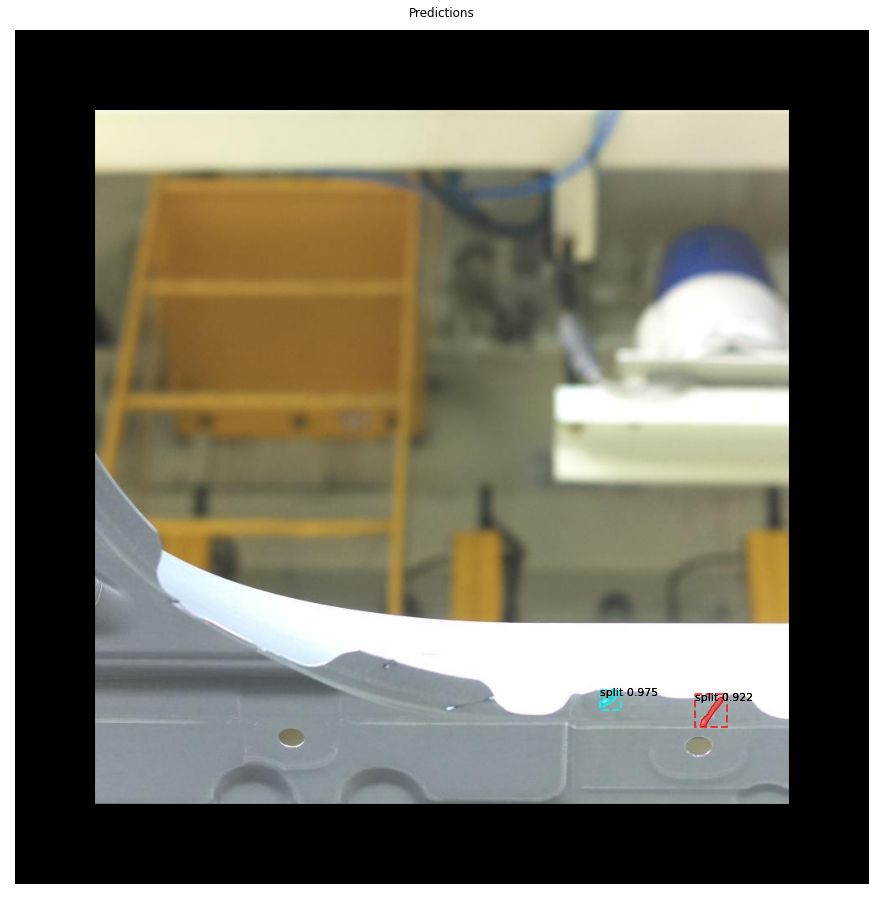

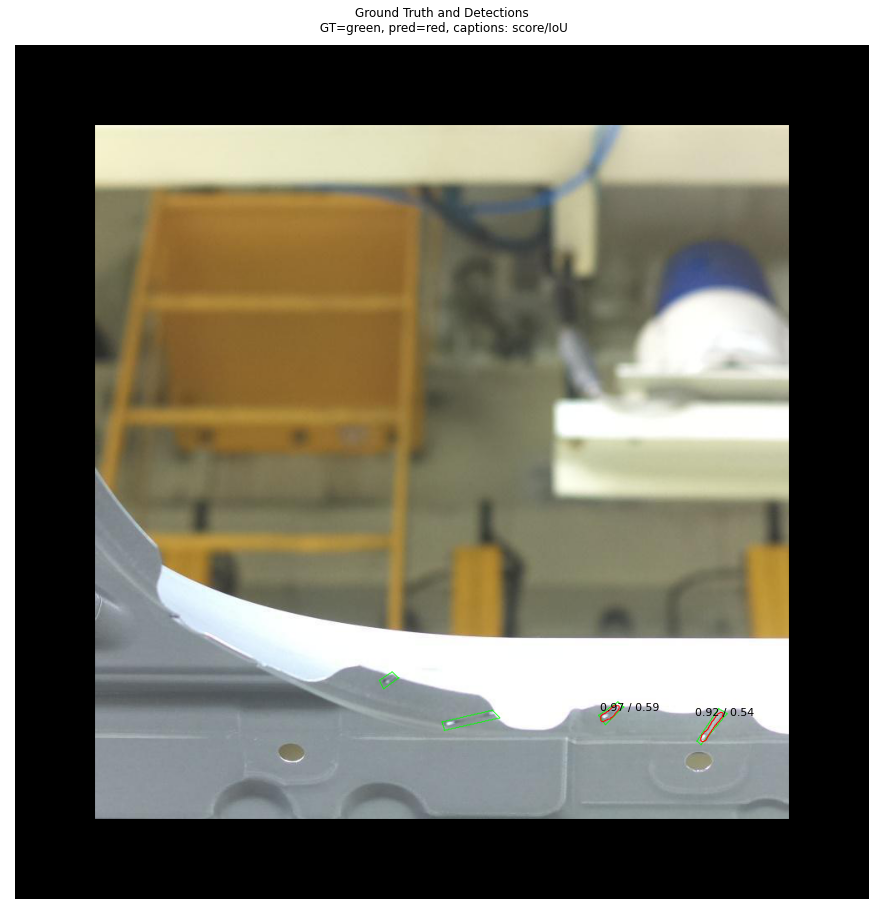

In [37]:
import matplotlib.image as mpimg

# Change this to the path of whatever image you want to test (doesn't even have to be from the val dataset)
path_to_new_image = "/content/drive/My Drive/fine-tune-MaskRcnn/polydetect/val/l.jpg"

image = mpimg.imread(path_to_new_image)
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))
print("Original image shape: ", modellib.parse_image_meta(image_meta[np.newaxis,...])["original_image_shape"][0])

# Run object detection
results = model.detect_molded(np.expand_dims(image, 0), np.expand_dims(image_meta, 0), verbose=1)

# Display predictions with scores
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax, 
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

# Compute AP over range 0.5 to 0.95 and print it
utils.compute_ap_range(gt_bbox, gt_class_id, gt_mask,
                       r['rois'], r['class_ids'], r['scores'], r['masks'],
                       verbose=1)

# Display ground truth boxes and predictions with scores and IoU
visualize.display_differences(image, gt_bbox, gt_class_id, gt_mask, r['rois'], 
                              r['class_ids'], r['scores'], r['masks'], 
                              dataset.class_names, ax=get_ax(), show_box=False, 
                              show_mask=False, iou_threshold=0.5, 
                              score_threshold=0.5)
